In [1]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'similarity']

#Read input files from the directory and returns DataTable object in a combined list
def read_clients(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        client_data.loc[(client_data['similarity'] > 1)] = 1
        data = data.append(client_data)
    data = data.groupby(data.index).mean()
    return data




In [2]:
def getECDF(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.similarity.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf


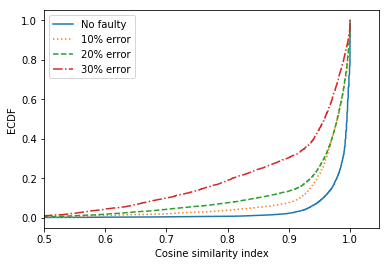

In [15]:
headers = ['time', 'similarity']

data0 = read_clients("faulty/0%/sim")
#data10 = read_clients("faulty/10/sim")
data10 = read_clients("faulty/10%/sim")
data20 = read_clients("faulty/20%/sim1")
data30 = read_clients("faulty/30%/sim")
styles=['-', ':', '--','-.']

#data_im = read_clients("im/sim")

getECDF(data0).plot(style=styles[0])
getECDF(data10).plot(style=styles[1])
getECDF(data20).plot(style=styles[2])
getECDF(data30).plot(style=styles[3])

plt.legend(['No faulty', '10% error', '20% error', '30% error'])
plt.xlim(0.5)
plt.xlabel('Cosine similarity index')
plt.ylabel('ECDF')
plt.show()

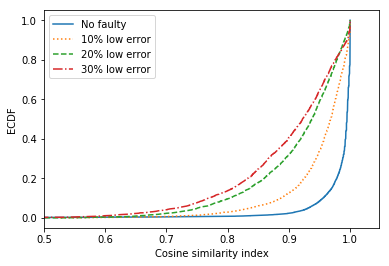

In [16]:
headers = ['time', 'similarity']

data0 = read_clients("faulty/0%/sim")
#data10 = read_clients("faulty/10/sim")
data10l = read_clients("faulty/10_low/sim")
data20l = read_clients("faulty/20_low/sim")
data30l = read_clients("faulty/30_low/sim")

styles=['-', ':', '--','-.']
#data_im = read_clients("im/sim")

getECDF(data0).plot(style=styles[0])
getECDF(data10l).plot(style=styles[1])
getECDF(data20l).plot(style=styles[2])
getECDF(data30l).plot(style=styles[3])

plt.legend(['No faulty', '10% low error', '20% low error', '30% low error'])
plt.xlabel('Cosine similarity index')
plt.ylabel('ECDF')
plt.xlim(0.5)

plt.show()

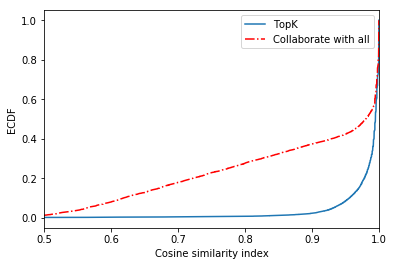

In [69]:
headers = ['time', 'similarity']

data0 = read_clients("faulty/0%/sim")
#data10 = read_clients("faulty/10/sim")
data10l = read_clients("im/sim")
styles=['-','-.']
#data_im = read_clients("im/sim")

getECDF(data0).plot(style=styles[0])
getECDF(data10l).plot(style=styles[1], color='red')

plt.legend(['TopK', 'Collaborate with all'])
plt.xlabel('Cosine similarity index')
plt.ylabel('ECDF')
plt.xlim(0.5)

plt.show()

In [39]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

#EXP_NAME = "tolerance/15"
headers = ['time', 'gateway','latency','actual_latency','sender']

#Read input files from the directory and returns DataTable object in a combined list
def read_gw_table(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        
        #client_data['time'] = pd.to_datetime(client_data['time'])
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        client_data.index = client_data.index.map(lambda x: x.replace(second=0))
        data = data.append(client_data)

    return data


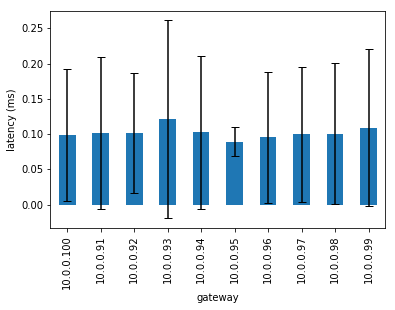

In [40]:
def getECDF1(df):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df.latency.value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

data = read_gw_table("cpu_bw/cpu_var/gw_table")
data = read_gw_table("faulty/10%/gw_table")
#for name, group in data.groupby('gateway'):
#data = data.quantile(0.9, numeric_only=False)
#print(data)
means = data.groupby('gateway').mean()
errors = data.groupby('gateway').std()
fig, ax = plt.subplots()
means['latency'].plot.bar(yerr=errors, ax=ax, capsize=4)
plt.ylabel('latency (ms)')
#plt.ylim(0,0.2)
plt.show()

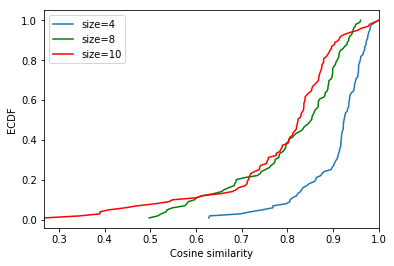

In [88]:
def getECDF2(df, name):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[name].value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

headers = ['round', 'size=4','size=8','size=10']
size = pd.read_csv('size.csv', sep=',')
size.columns = headers
size = size.set_index(size['round'])
getECDF2(size, 'size=4').plot()
getECDF2(size, 'size=8').plot(color='green')
getECDF2(size, 'size=10').plot(color='red')

plt.legend(['size=4','size=8','size=10'])
plt.xlabel('Cosine similarity')
plt.ylabel('ECDF')
plt.show()

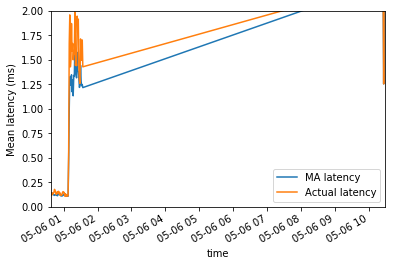

In [42]:
data = read_gw_table("cpu_bw/gw_change/gw_change2")
data =data.query('gateway == "10.0.0.93"')
data.groupby(data.index).mean().plot()
plt.ylabel('Mean latency (ms)')
plt.legend(['MA latency', 'Actual latency'])
plt.ylim(0,2)
plt.show()


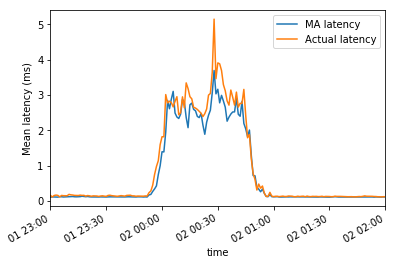

In [16]:
data = read_gw_table("cpu_bw/gw_change/gw_change1")
data =data.query('gateway == "10.0.0.93"')
data.groupby(data.index).mean().plot()
plt.xlim(pd.Timestamp('2019/05/01 23:00:00'),pd.Timestamp('2019/05/02 02:00:00'))
plt.ylabel('Mean latency (ms)')
plt.legend(['MA latency', 'Actual latency'])
plt.show()


In [33]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

EXP_NAME = "cpu_bw/node_change/sim"
headers = ['time', 'similarity','gateways','collaborators']

#Read input files from the directory and returns DataTable object in a combined list
def read_sim(EXP_NAME):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    for client in dirs:
        client_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        client_data.columns= headers
        client_data = client_data.set_index(pd.DatetimeIndex(client_data['time']))
        client_data.loc[(client_data['similarity'] > 1)] = 1
        data = data.append(client_data)
    data = data.groupby(data.index).mean()
    return data

sim_data = read_sim(EXP_NAME)
sim_data10 = read_sim("cpu_bw/node_change/sim10")
sim_data20 = read_sim("cpu_bw/node_change/sim20")

def getECDF3(df, name):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[name].value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

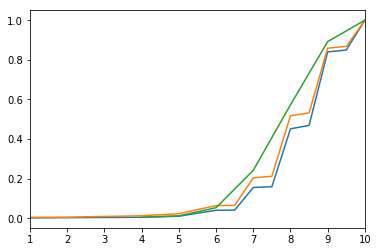

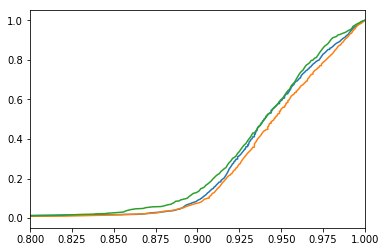

In [38]:
getECDF3(sim_data,'gateways').plot()
getECDF3(sim_data10,'gateways').plot()
getECDF3(sim_data20,'gateways').plot()
plt.show()
getECDF3(sim_data,'similarity').plot()
getECDF3(sim_data10,'similarity').plot()
getECDF3(sim_data20,'similarity').plot()
plt.xlim(0.8)

plt.show()
